In [0]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pal=sns.color_palette()

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fake_news_train.csv to fake_news_train.csv
User uploaded file "fake_news_train.csv" with length 924667 bytes


In [0]:
df_train = pd.read_csv(io.BytesIO(uploaded["fake_news_train.csv"]))

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fake_news_test.csv to fake_news_test.csv
User uploaded file "fake_news_test.csv" with length 417894 bytes


In [0]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded['fake_news_test.csv']))

In [8]:
df_train.head()

,label,text,title,source
0,Fake,I woke up this morning to find a variation of ...,Proof The Mainstream Media Is Manipulating The...,BuzzFeed
1,Fake,Thanks in part to the declassification of Defe...,Declassified Docs Show That Obama Admin Create...,BuzzFeed
2,Real,"Story highlights ""This, though, is certain: to...",Hillary Clinton on police shootings: 'too many...,BuzzFeed
3,Fake,The Democrats are using an intimidation tactic...,Why is it ìRACISTî to Question Someoneís Birth...,BuzzFeed
4,Real,Critical Counties is a CNN series exploring 11...,"Critical counties: Wake County, NC, could put ...",BuzzFeed


In [0]:
df_test.head()

,ID,text,title,source
0,1,"On Saturday, September 17 at 8:30 pm EST, an e...",Another Terrorist Attack in NYC…Why Are we STI...,BuzzFeed
1,2,Last week I wrote an article titled “Donald Tr...,More Milestone Moments for Donald Trump! – Eag...,BuzzFeed
2,3,After collapsing just before trying to step in...,A Hillary Clinton Administration May be Entire...,BuzzFeed
3,4,When President Obama spoke at the United Natio...,Obama Pushes One World Government,BuzzFeed
4,5,Peaceful protesters crowded Charlotte's first ...,Young Girl's Emotional Council Speech Laments ...,BuzzFeed


# Text Analysis

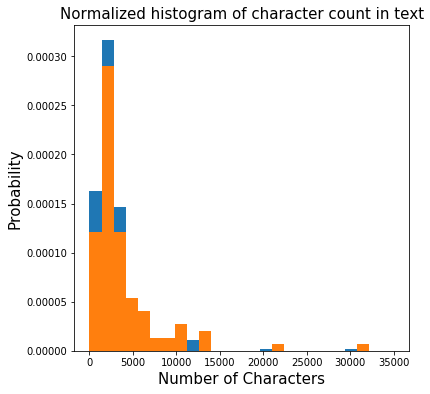

mean-train 2812.45 
std-train 2842.29
mean_test 3822.51
std_test 4308.92
max-train 30420.00
max-test 31994.00


In [10]:
train_text=pd.Series(df_train.text.tolist()).astype(str)
test_text=pd.Series(df_test.text.tolist()).astype(str)


dist_train=train_text.apply(len)
dist_test=test_text.apply(len)
plt.figure(figsize=(6,6))
plt.hist(dist_train, bins=25, range=[0,35000], normed=True, label='train')
plt.hist(dist_test, bins=25, range=[0,35000],normed=True, label='test')
plt.title('Normalized histogram of character count in text', fontsize=15)
plt.xlabel('Number of Characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

print('mean-train {:.2f} \nstd-train {:.2f}\nmean_test {:.2f}\nstd_test {:.2f}\nmax-train {:.2f}\nmax-test {:.2f}'.\
      format(dist_train.mean(), dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

(-0.5, 1439.5, 1079.5, -0.5)

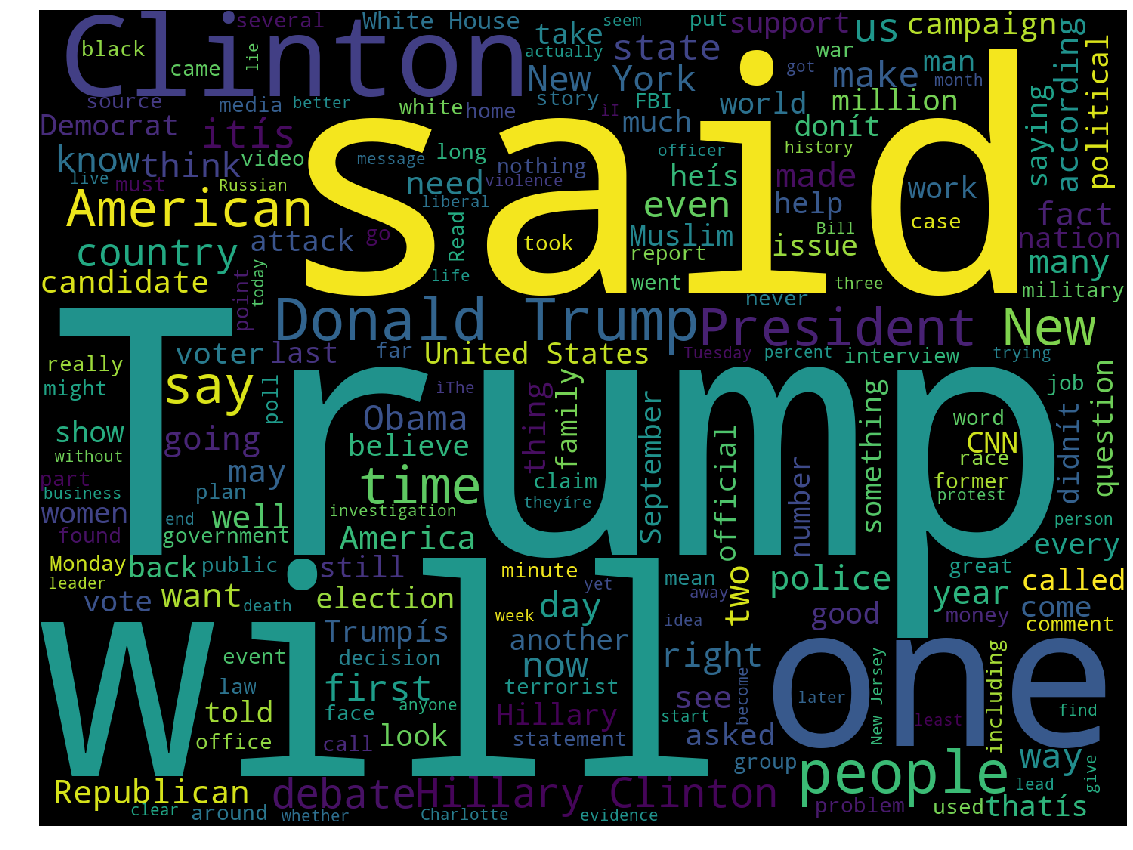

In [11]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(' '.join(train_text))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# Semantic Analysis
Next we will look at the punctuation in news

In [12]:
qmarks = np.mean(train_text.apply(lambda x: "?" in x))
fullstop = np.mean(train_text.apply(lambda x: '.' in x))
capital_first = np.mean(train_text.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_text.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_text.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 38.61%
Questions with full stops: 99.05%
Questions with capitalised first letters: 83.54%
Questions with capital letters: 100.00%
Questions with numbers: 80.70%


# Initial Feature Analysis

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df_test.text = df_test.text.astype('str')

In [15]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# Convert to training data to lower case
df_train.text = df_train.text.apply(lambda x: x.lower())
df_train.title = df_train.title.apply(lambda x: x.lower())
df_train.source = df_train.source.apply(lambda x: x.lower())

# Convert to testing data to lower case
df_test.text = df_test.text.apply(lambda x: x.lower())
df_test.title = df_test.title.apply(lambda x: x.lower())
df_test.source = df_test.source.apply(lambda x: x.lower())

# Tokenize training text and remove stop words
word_tokens = df_train.text.apply(word_tokenize)
word_tokens = word_tokens.apply(lambda x: [item for item in x if item not in stops])
word_tokens = word_tokens.apply(lambda x: ' '.join(x))
df_train['text'] = word_tokens

# Tokenize training title and remove stop words
train_title_tokens = df_train.title.apply(word_tokenize)
train_title_tokens = train_title_tokens.apply(lambda x: [item for item in x if item not in stops])
train_title_tokens = train_title_tokens.apply(lambda x: ' '.join(x))
df_train['title'] = train_title_tokens

# Tokenize training source
train_source_tokens = df_train.source.apply(word_tokenize)
train_source_tokens = train_source_tokens.apply(lambda x: ' '.join(x))
df_train['source'] = train_source_tokens

# Tokenize testing text and remove stop words
test_word_tokens = df_test.text.apply(word_tokenize)
test_word_tokens = test_word_tokens.apply(lambda x: [item for item in x if item not in stops])
test_word_tokens = test_word_tokens.apply(lambda x: ' '.join(x))
df_test['text'] = test_word_tokens

# Tokenize testing title and remove stop words
test_title_tokens = df_test.title.apply(word_tokenize)
test_title_tokens = test_title_tokens.apply(lambda x: [item for item in x if item not in stops])
test_title_tokens = test_title_tokens.apply(lambda x: ' '.join(x))
df_test['title'] = test_title_tokens

# Tokenize testing source
test_source_tokens = df_test.source.apply(word_tokenize)
test_source_tokens = test_source_tokens.apply(lambda x: ' '.join(x))
df_test['source'] = test_source_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# Combine all the features together and remove punctuation
df_test['feature'] = (df_test['source'] + ' ' + df_test['title'] + ' ' + df_test['text'])
df_test["feature"] = df_test['feature'].str.replace('[^\w\s]','')

df_train['feature'] = (df_train['source'] + ' ' + df_train['title'] + ' ' + df_train['text'])
df_train["feature"] = df_train['feature'].str.replace('[^\w\s]','')

In [17]:
df_test.head()

,ID,text,title,source,feature
0,1,"saturday , september 17 8:30 pm est , explosio...",another terrorist attack nycöwhy still politic...,buzzfeed,buzzfeed another terrorist attack nycöwhy stil...
1,2,last week wrote article titled ìdonald trumpís...,milestone moments donald trump ! ñ eagle rising,buzzfeed,buzzfeed milestone moments donald trump ñ eag...
2,3,collapsing trying step van removed 9-11 ceremo...,hillary clinton administration may entirely ru...,buzzfeed,buzzfeed hillary clinton administration may en...
3,4,president obama spoke united nations espoused ...,obama pushes one world government,buzzfeed,buzzfeed obama pushes one world government pre...
4,5,peaceful protesters crowded charlotte 's first...,young girl 's emotional council speech laments...,buzzfeed,buzzfeed young girl s emotional council speech...


In [18]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import regularizers

Using TensorFlow backend.


In [0]:
## some config values 
embed_size = 300 # how big is each word vector
max_features = 10000 #how many unique words to use (i.e num rows in embedding vector)
maxlen = 2610 # max number of words in a news to use

## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df_train['feature']))
train_X = tokenizer.texts_to_sequences(df_train['feature'])
test_X = tokenizer.texts_to_sequences(test_text)

## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

## Get the target values
train_y = df_train['label'].values

In [0]:
le = LabelEncoder()
train_y = le.fit_transform(train_y)

In [0]:
early_stopping_monitor = EarlyStopping(monitor='val_acc',patience=2)

# Bidirectional GRU model

In [22]:
folds = KFold(n_splits=10, shuffle=True, random_state=2019)
# Create arrays and dataframes to store results
pred_glove_val_y = np.zeros(df_train.shape[0])
pred_glove_val_y = pred_glove_val_y[:,np.newaxis]
pred_glove_test_y  = np.zeros(df_test.shape[0])
pred_glove_test_y  = pred_glove_test_y [:,np.newaxis]

# Use 10 fold cross validation because the dataset is small
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df_train['feature'], df_train['label'])):
  
  inp = Input(shape=(maxlen,))
  x = Embedding(max_features, embed_size)(inp)
  x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
  x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
  x = GlobalMaxPooling1D()(x)
  x = Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.05))(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  
  ## Train the model 
  model.fit(train_X[train_idx], train_y[train_idx], batch_size=32, epochs=10,\
            validation_data=(train_X[valid_idx], train_y[valid_idx]),\
            callbacks = [early_stopping_monitor])
  
  pred_glove_test_y  += model.predict(test_X, batch_size=32, verbose=0) / folds.n_splits
  pred_glove_val_y[valid_idx] = model.predict(train_X[valid_idx])
  
  
  del model, inp, x
  gc.collect()
  
  print('Fold %2d' % (n_fold+1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 284 samples, validate on 32 samples
Epoch 1/10
284/284 [==============================] - 8s 28ms/step - loss: 1.9292 - acc: 0.5246 - val_loss: 1.8494 - val_acc: 0.8125
Epoch 2/10
284/284 [==============================] - 2s 7ms/step - loss: 1.7668 - acc: 0.8451 - val_loss: 1.7172 - val_acc: 0.5938
Epoch 3/10
284/284 [==============================] - 2s 7ms/step - loss: 1.6152 - acc: 0.8662 - val_loss: 1.5888 - val_acc: 0.7188
Fold  1
Train on 284 samples, validate on 32 samples
Epoch 1/10
284/284 [==============================] - 3s 11ms/step - loss: 1.9483 - acc: 0.5845 - val_loss: 1.8719 - val_acc: 0.6875
Epoch 2/10
284/284 [==============================] - 2s 7m

In [23]:
# Testing the accuracy for each threshold
for thresh in np.arange(0.3, 0.801, 0.01):
    thresh = np.round(thresh, 2)
    print("Accuracy score at threshold {0} is {1}".format(thresh, metrics.accuracy_score(train_y, (pred_glove_val_y>thresh).astype(int))))

Accuracy score at threshold 0.3 is 0.5791139240506329
Accuracy score at threshold 0.31 is 0.5791139240506329
Accuracy score at threshold 0.32 is 0.5791139240506329
Accuracy score at threshold 0.33 is 0.5791139240506329
Accuracy score at threshold 0.34 is 0.5791139240506329
Accuracy score at threshold 0.35 is 0.5822784810126582
Accuracy score at threshold 0.36 is 0.5854430379746836
Accuracy score at threshold 0.37 is 0.5917721518987342
Accuracy score at threshold 0.38 is 0.5949367088607594
Accuracy score at threshold 0.39 is 0.5949367088607594
Accuracy score at threshold 0.4 is 0.5981012658227848
Accuracy score at threshold 0.41 is 0.5981012658227848
Accuracy score at threshold 0.42 is 0.5981012658227848
Accuracy score at threshold 0.43 is 0.6075949367088608
Accuracy score at threshold 0.44 is 0.6075949367088608
Accuracy score at threshold 0.45 is 0.6170886075949367
Accuracy score at threshold 0.46 is 0.629746835443038
Accuracy score at threshold 0.47 is 0.6582278481012658
Accuracy scor

In [0]:
# Write the submission file
sub_df = df_test[['ID']].copy()
result=[]
for i in np.nditer(pred_glove_test_y):
  if i >= 0.44:
    result.append('Real')
  else:
    result.append('Fake')
result = np.array(result)
sub_df['label'] = result
sub_df[['ID', 'label']].to_csv('GRU.csv', index= False)
files.download("GRU.csv")

In [0]:
# Write the submission file
sub_df = df_test[['ID']].copy()
result=[]
for i in np.nditer(pred_glove_test_y):
  if i >= 0.44:
    result.append('Real')
  else:
    result.append('Fake')
result = np.array(result)
sub_df['label'] = result
sub_df[['ID', 'label']].to_csv('Glove.csv', index= False)
files.download("Glove.csv")